## [作業重點]
使用 Sklearn 中的線性迴歸模型，來訓練各種資料集，務必了解送進去模型訓練的**資料型態**為何，也請了解模型中各項參數的意義

## 作業
試著使用 sklearn datasets 的其他資料集 (wine, boston, ...)，來訓練自己的線性迴歸模型。

### HINT: 注意 label 的型態，確定資料集的目標是分類還是回歸，在使用正確的模型訓練！

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score

In [2]:
wine = datasets.load_wine()


X = wine.data
X

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [3]:
print('DataShape: ', X.shape)

x_train, x_test, y_train, y_test = train_test_split(X, wine.target, test_size=0.1, random_state=5)

# 查看wine.target後，此資料集目標應為分類
log_re = linear_model.LogisticRegression(solver='liblinear', multi_class='auto')
log_re.fit(x_train, y_train)

y_pred = log_re.predict(x_test)

DataShape:  (178, 13)


In [4]:
y_pred

array([0, 1, 0, 0, 2, 2, 0, 0, 1, 1, 0, 0, 2, 1, 2, 0, 1, 0])

In [5]:
y_test

array([0, 1, 0, 0, 2, 2, 0, 0, 1, 0, 0, 0, 2, 1, 2, 0, 1, 0])

In [6]:
acc = accuracy_score(y_test, y_pred)
print("Accuracy: ", acc)

Accuracy:  0.9444444444444444


In [7]:
boston = datasets.load_boston()

X = boston.data[:, np.newaxis, 5] # 此種寫法應該是一個語法糖
# 效果和 X_ = wine.data[:, 3][:, np.newaxis] 相同
# 由於 wine.data[:, 3]產生的為一個行向量，因此會需要再增加一個維度
print(X.shape)
X

(506, 1)


array([[6.575],
       [6.421],
       [7.185],
       [6.998],
       [7.147],
       [6.43 ],
       [6.012],
       [6.172],
       [5.631],
       [6.004],
       [6.377],
       [6.009],
       [5.889],
       [5.949],
       [6.096],
       [5.834],
       [5.935],
       [5.99 ],
       [5.456],
       [5.727],
       [5.57 ],
       [5.965],
       [6.142],
       [5.813],
       [5.924],
       [5.599],
       [5.813],
       [6.047],
       [6.495],
       [6.674],
       [5.713],
       [6.072],
       [5.95 ],
       [5.701],
       [6.096],
       [5.933],
       [5.841],
       [5.85 ],
       [5.966],
       [6.595],
       [7.024],
       [6.77 ],
       [6.169],
       [6.211],
       [6.069],
       [5.682],
       [5.786],
       [6.03 ],
       [5.399],
       [5.602],
       [5.963],
       [6.115],
       [6.511],
       [5.998],
       [5.888],
       [7.249],
       [6.383],
       [6.816],
       [6.145],
       [5.927],
       [5.741],
       [5.966],
       [

In [9]:
x_train, x_test, y_train, y_test = train_test_split(X, boston.target, test_size=0.1, random_state=5)

# 根據boston.target，此資料及目標應為迴歸
reg = linear_model.LinearRegression()
reg.fit(x_train, y_train)

y_pred = reg.predict(x_test)

In [10]:
y_pred

array([38.54483845, 25.74880811, 23.81579076, 10.10316534, 35.37759407,
       13.71509447, 28.88882691, 26.6200272 , 26.52020001, 23.99729474,
       32.88191439, 19.89530487, 19.77732729, 31.2483786 , 24.91388982,
       19.10576258,  7.58026007, 14.62261436, 14.49556157, 17.82615954,
       11.80022752, 23.40740682, 40.59583339, 23.49815881, 29.90524917,
       18.70645383, 23.44370761, 21.62866785, 22.89919568, 25.28597297,
       18.72460422, 14.71336634, 19.00593539, 32.67318482, 24.52365627,
       22.98994767, 25.75788331, 19.08761218, 41.79375963, 29.32443645,
       21.78294623, 11.12866281, 25.63990573, 19.81362808, 25.01371701,
       27.93593103,  6.5910634 , 19.6775001 , 21.13860711, 21.61051745,
       21.18398311])

In [11]:
print('Coefficients: ', reg.coef_)

print('Mean Squared Error: %.2f' % mean_squared_error(y_test, y_pred))

Coefficients:  [9.07519882]
Mean Squared Error: 22.09


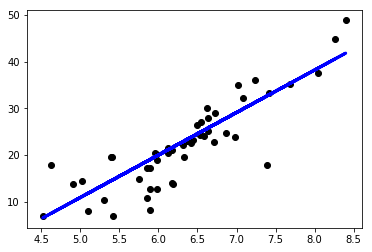

In [15]:
plt.scatter(x_test, y_test, color='black')
plt.plot(x_test, y_pred, color='blue', linewidth=3)
plt.show()

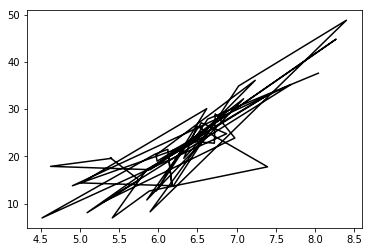

In [14]:
plt.plot(x_test, y_test, color='black') # plot會把所有點連起來ＸＤ,所以若點不是預測出來得(非100%遵循某規律)，通常就會亂七八糟
plt.show()